<a href="https://colab.research.google.com/github/SvetLanchY/CompLing/blob/main/Karan_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import os
import os.path 

import string
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

os.getcwd()
os.listdir()

!pip install pymystem3==0.1.10
!pip install pymorphy2[fast]

from pymorphy2 import MorphAnalyzer
from pymystem3 import Mystem
mystem = Mystem() 
morph = MorphAnalyzer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
  Found existing installation: pymystem3 0.2.0
    Uninstalling pymystem3-0.2.0:
      Successfully uninstalled pymystem3-0.2.0
     |████████████████████████████████| 61kB 2.6MB/s 
     |████████████████████████████████| 8.2MB 7.0MB/s 
     |████████████████████████████████| 378kB 36.4MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp37-cp37m-linux_x86_64.whl size=862625 sha256=c63181b65c7930b41e1d1bcbdadb6b258380b40e0f21187a9a7a84fb9462987d
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
Successfully built DAWG


Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz


In [2]:
from google.colab import files #строка импорта
files.upload()



Saving quran_kuliev.txt to quran_kuliev.txt


{'quran_kuliev.txt': b'\xef\xbb\xbf\r\n\r\n\xd0\xa1\xd0\xbc\xd1\x8b\xd1\x81\xd0\xbb\xd0\xbe\xd0\xb2\xd0\xbe\xd0\xb9 \xd0\xbf\xd0\xb5\xd1\x80\xd0\xb5\xd0\xb2\xd0\xbe\xd0\xb4 \xd0\xa1\xd0\xb2\xd1\x8f\xd1\x89\xd0\xb5\xd0\xbd\xd0\xbd\xd0\xbe\xd0\xb3\xd0\xbe \xd0\x9a\xd0\xbe\xd1\x80\xd0\xb0\xd0\xbd\xd0\xb0\r\n\r\n\r\n\r\n\r\n\r\n \xd0\xad\xd0\xbb\xd1\x8c\xd0\xbc\xd0\xb8\xd1\x80 \xd0\x9a\xd1\x83\xd0\xbb\xd0\xb8\xd0\xb5\xd0\xb2\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\xd0\xa1\xd1\x83\xd1\x80\xd0\xb0 1 \xc2\xab\xd0\x90\xd0\x9b\xd0\xac-\xd0\xa4\xd0\x90\xd0\xa2\xd0\x98\xd0\xa5\xd0\x90\xc2\xbb\r\n(\xc2\xab\xd0\x9e\xd0\xa2\xd0\x9a\xd0\xa0\xd0\xab\xd0\x92\xd0\x90\xd0\xae\xd0\xa9\xd0\x90\xd0\xaf \xd0\x9a\xd0\x9e\xd0\xa0\xd0\x90\xd0\x9d\xc2\xbb)\r\n1. \xd0\x92\xd0\xbe \xd0\xb8\xd0\xbc\xd1\x8f \xd0\x90\xd0\xbb\xd0\xbb\xd0\xb0\xd1\x85\xd0\xb0, \xd0\x9c\xd0\xb8\xd0\xbb\xd0\xbe\xd1\x81\xd1\x82\xd0\xb8\xd0\xb2\xd0\xbe\xd0\xb3\xd0\xbe, 

In [3]:
with open('quran_kuliev.txt', encoding = "utf-8") as f:
    data = f.read()

In [6]:
def preprocess(data):
  preprocessed = data.lower().translate(str.maketrans('','',string.punctuation))
  preprocessed = re.sub(r'[\d+,\n+,«,»]', '', preprocessed)
  preprocessed = mystem.lemmatize(preprocessed)
  return preprocessed  
print(preprocess(data))
 


['\ufeff', 'смысловой', ' ', 'перевод', ' ', 'священный', ' ', 'коран', ' ', 'эльмир', ' ', 'кулиевсур', '  ', 'альфатихаоткрывать', ' ', 'коран', ' ', 'во', ' ', 'имя', ' ', 'аллах', ' ', 'милостивый', ' ', 'милосердный', ' ', 'хвала', ' ', 'аллах', ' ', 'господь', ' ', 'мир', ' ', 'милостивый', ' ', 'милосердный', ' ', 'властелин', ' ', 'день', ' ', 'воздаяние', ' ', 'ты', ' ', 'один', ' ', 'мы', ' ', 'поклоняться', '\xa0', 'и', '\xa0', 'ты', ' ', 'один', ' ', 'молить', ' ', 'о', '\xa0', 'помощь', ' ', 'вести', ' ', 'мы', ' ', 'прямой', ' ', 'путем', ' ', 'путем', ' ', 'тот', ' ', 'кто', ' ', 'ты', ' ', 'облагодетельствовать', ' ', 'не', ' ', 'тот', ' ', 'на', ' ', 'кто', ' ', 'пасть', ' ', 'гнев', ' ', 'и', '\xa0', 'не', ' ', 'заблудшихсур', '  ', 'альбакаракороваво', ' ', 'имя', ' ', 'аллах', ' ', 'милостивый', ' ', 'милосердный', ' ', 'алиф', ' ', 'лама', ' ', 'мим', ' ', 'этот', ' ', 'писание', ' ', 'в', '\xa0', 'который', ' ', 'нет', ' ', 'сомнение', ' ', 'являться', ' ', 'верны

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


rustopwords = stopwords.words('russian')
rustopwords.extend(['\xa0', '\xa0— ', 'который', 'это', 'свой', 'весь', 'твой', 'ваш', 'наш', ' '])
data1 = [word for word in preprocess(data) if word not in rustopwords]
print(sorted(data1))

In [10]:
from nltk.probability import FreqDist
fdist = FreqDist(data1)
fdist.most_common(25)

[('аллах', 2917),
 ('сказать', 1334),
 ('воистину', 899),
 ('господь', 836),
 ('человек', 677),
 ('день', 502),
 ('уверовать', 502),
 ('земля', 499),
 ('являться', 496),
 ('знать', 480),
 ('совершать', 416),
 ('знамение', 384),
 ('говорить', 374),
 ('посланник', 364),
 ('путь', 352),
 ('становиться', 335),
 ('небо', 319),
 ('мочь', 298),
 ('неверующий', 293),
 ('неужели', 293),
 ('милость', 283),
 ('ниспосылать', 268),
 ('пожелать', 256),
 ('мучение', 249),
 ('писание', 239)]

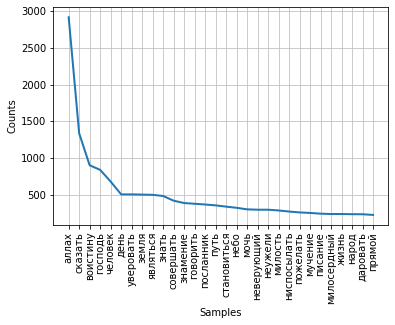

In [11]:
fdist.plot(30,cumulative=False)

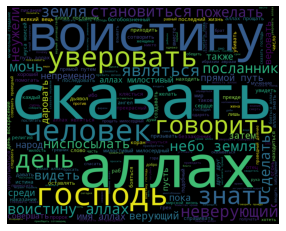

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

text_raw = " ".join(data1)
#wordcloud = WordCloud().generate(text_raw)

# wc = WordCloud().generate(text_raw)
# plt.axis("off")
# plt.imshow(wc)

wc = WordCloud(background_color="black", max_words=200, width=1000, height=800).generate(text_raw)# to recolour the image
plt.axis("off")
plt.imshow(wc)
